In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
d = pd.read_csv('/content/placement.csv')
d

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [5]:
d[:5]

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [8]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [9]:
d.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


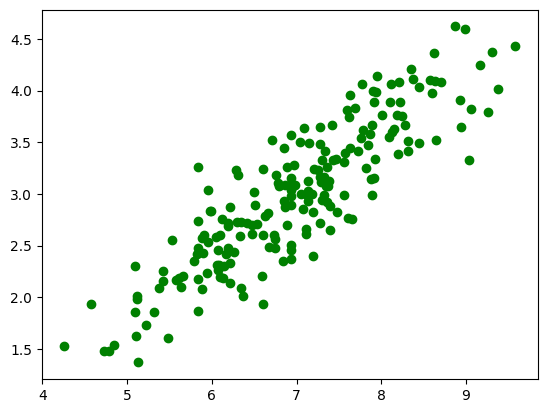

In [11]:
plt.scatter(d.cgpa,d.package,color='Green')

array([[<Axes: title={'center': 'cgpa'}>,
        <Axes: title={'center': 'package'}>]], dtype=object)

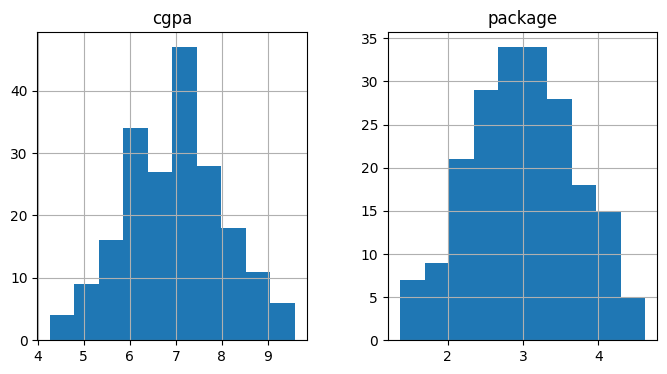

In [13]:
d.hist(figsize=(8,4))

**Seperate-out Input & Output**

In [16]:
a = d[['cgpa']]
a[:5]

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94


In [17]:
b = d[['package']]
b[:5]

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57


## Training Phase


In [64]:

from sklearn.linear_model import LinearRegression

In [60]:
model = LinearRegression() #Create Object - model and call the constructor LinearRegression()

In [23]:
model

LinearRegression()

In [63]:
# Provide Input and output in fit()
model.fit(a,b)

LinearRegression()

In [25]:
model.score(a,b)

0.7756192256051151

#Testing Phase
Provide input in model.predict to get predicted output

In [28]:
a[:5]

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94


## lets check predicted package for 7.42 cgpa

In [31]:
model.predict([[7.42]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[3.24068946]])

## Actual package for 7.42 cgpa

In [35]:
b[:5] #3.67

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57


## Create Test data by using input only - a

In [38]:
test_data = a
test_data[:5]

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94


## lets check predicted data for given test data

In [39]:
pred_data = model.predict(test_data)
pred_data[:5]

array([[2.93880607],
       [1.93062948],
       [3.46852598],
       [3.24068946],
       [2.96728564]])

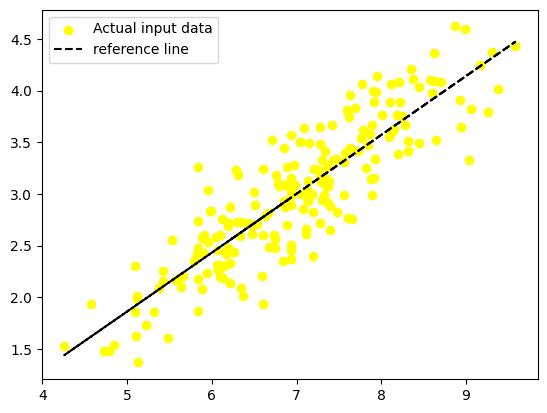

In [45]:
#lets Plot
plt.scatter(a,b,color='yellow',label='Actual input data')
plt.plot(test_data,pred_data,'k--',label='reference line')
plt.legend()

## **Lets check performance of ML model**

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [52]:
new = d.tail(5)
new

,cgpa,package
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96
199,6.22,2.33


## Lets seperate new Test input & Output

In [53]:
new_input = new[['cgpa']]
new_input

,cgpa
195,6.93
196,5.89
197,7.21
198,7.63
199,6.22


In [54]:
new_output = new[['package']]
new_output

,package
195,2.46
196,2.57
197,3.24
198,3.96
199,2.33


In [55]:
#Lets Predict new data
p = model.predict(new_input)
p

array([[2.96158973],
       [2.36921478],
       [3.12107529],
       [3.36030363],
       [2.55717991]])

In [57]:
#Now lets check the error
mean_absolute_error(new_output,p)

0.32963518634381667

In [58]:
mean_squared_error(new_output,p)

0.14345929762971016

In [59]:
#Lets check model accuracy by r2 score
#r2 score should be inbetween 0 - 1
r2_score(new_output,p)

0.6155720152697115